#### Name- Shobhit Rajput        
#### Registration Number- 12016896                   
#### Roll No.- RK20RUA22

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [84]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [85]:
df= pd.read_csv("D:/Downloads D/archive/supermarket_sales.csv")

In [86]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [88]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Data Cleaning

In [89]:
df.shape

(1000, 17)

### Removing Outliers

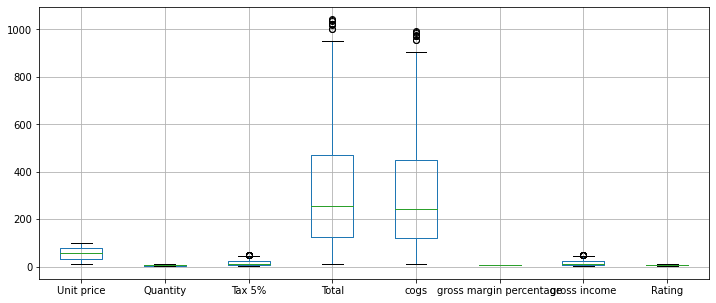

In [90]:
plt.figure(figsize=(12,5))

df.boxplot();

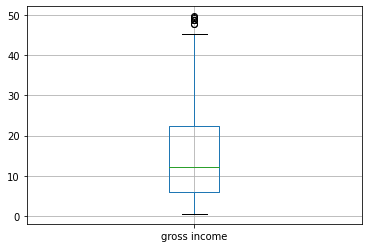

In [91]:
df.boxplot(['gross income']);

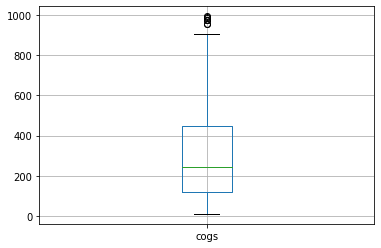

In [92]:
df.boxplot(['cogs']);

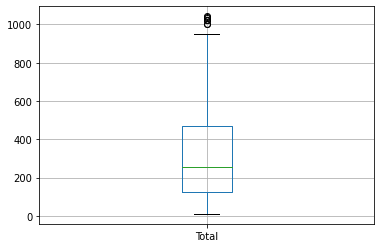

In [93]:
df.boxplot(['Total']);

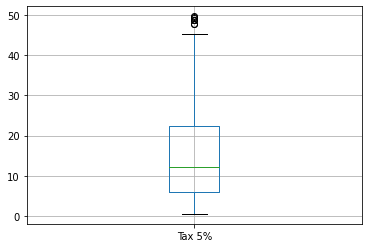

In [94]:
df.boxplot(['Tax 5%']);

In [95]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unit price                  45.060000
Quantity                     5.000000
Tax 5%                      16.520375
Total                      346.927875
cogs                       330.407500
gross margin percentage      0.000000
gross income                16.520375
Rating                       3.000000
dtype: float64


In [80]:
clean=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [81]:
clean.shape

(9, 17)

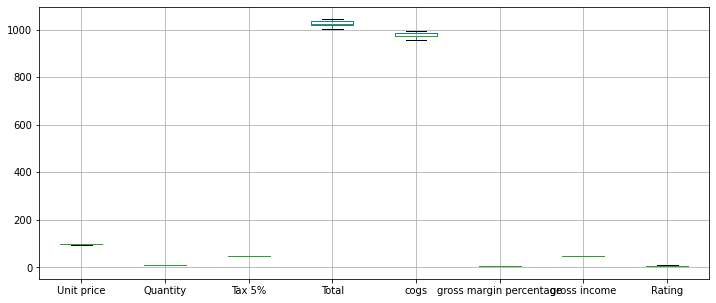

In [82]:
plt.figure(figsize=(12,5))

clean.boxplot();

In [18]:
df=clean

#### Data has been cleaned and can be further analysed to gain insights on the data

In [19]:
df.Branch.unique()


array(['A', 'C', 'B'], dtype=object)

In [20]:
df.nunique()

Invoice ID                 991
Branch                       3
City                         3
Customer type                2
Gender                       2
Product line                 6
Unit price                 934
Quantity                    10
Tax 5%                     981
Total                      981
Date                        89
Time                       504
Payment                      3
cogs                       981
gross margin percentage      1
gross income               981
Rating                      61
dtype: int64

In [21]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Univariate Analysis 

### Do we have more Male or Female customers?

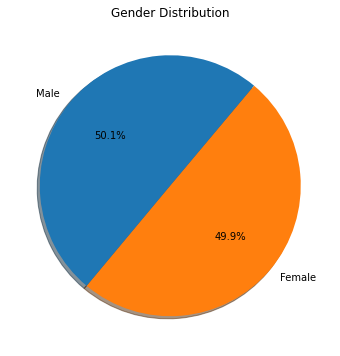

In [22]:
gender=df.Gender.value_counts()
plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender,labels=gender.index,autopct='%.1f%%', startangle=50,shadow=True);

#### Inferences:
We can see that we have almost same amount of male and female customers and we will further analyse the male female ratio with other columns in the analysis done below.

### Do we have more Member or Non-Member customers?

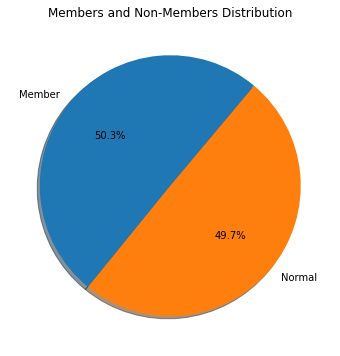

In [23]:
cust=df['Customer type'].value_counts()
plt.figure(figsize=(12,6))
plt.title("Members and Non-Members Distribution")
plt.pie(cust,labels=cust.index,autopct='%1.1f%%', startangle=50,shadow=True);

#### Inferences:
We can see that we have almost same amount of member and normal customers. 

#### Suggestion:
We should do a survey to find out why people are not registering as our member.

### What payment method do our customers mostly use?

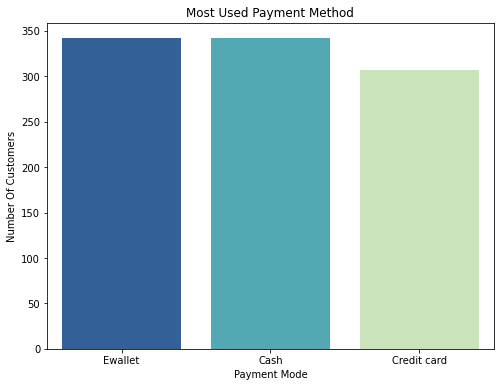

In [24]:
u=df["Payment"].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=u.index, y=u, palette='YlGnBu_r')
plt.xlabel("Payment Mode")
plt.ylabel("Number Of Customers")
plt.title("Most Used Payment Method");

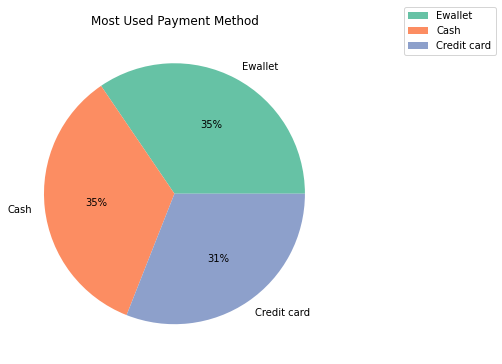

In [25]:
f=df["Payment"].value_counts()
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(f, labels=f.index,colors=palette_color,autopct='%.0f%%')
plt.legend(f.index,loc="right", bbox_to_anchor=[1.5, 1])
plt.title("Most Used Payment Method");

#### Inferences:
We can see that Ewallet and Cash is the most used payment of method in our stores.

#### Suggestion: 
We can partner up with an edtech company and make our Ewallet transactions smoother and more diversified for customers. So that they can use it more easily. This will save time both for our customers and our staff.

### Which store branch has most number of customers?

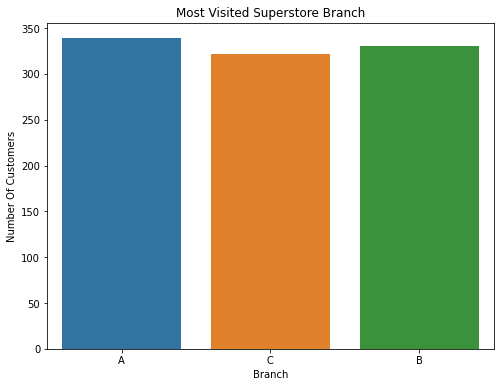

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["Branch"])
plt.ylabel("Number Of Customers")
plt.title("Most Visited Superstore Branch");

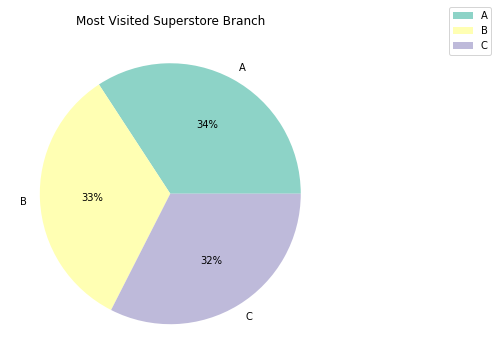

In [27]:
f=df["Branch"].value_counts()
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set3')
plt.pie(f, labels=f.index,colors=palette_color,autopct='%.0f%%')
plt.legend(f.index,loc="right", bbox_to_anchor=[1.5, 1])
plt.title("Most Visited Superstore Branch");

#### Inferences:
We can see that A is the most visited store branch. It should also result in more income than the other stores, we will confirm this assumption in the analysis done below.


### What ratings do we recieve most from our customers?

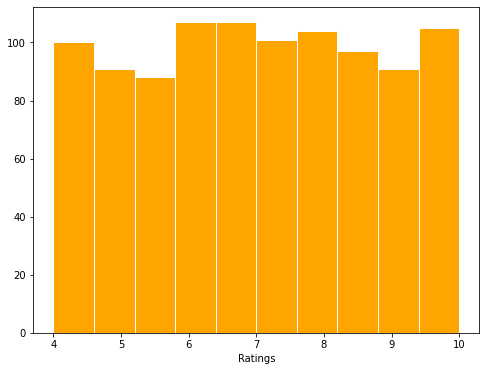

In [28]:
plt.figure(figsize=(8,6))
plt.hist(df.Rating, color="orange",edgecolor="white");
plt.xlabel("Ratings")
plt.show()

#### Inferences:
We can see that we mostly recieve rating between 6-7.

#### Suggestion: 
We should do a survey with our customers as to find out what they are unsatisfied with.

### What is the cost range of the products that got sold?

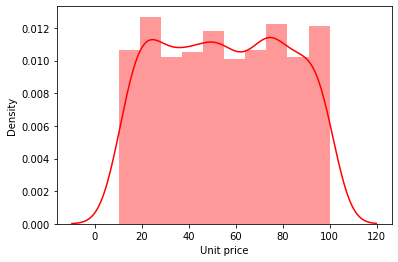

In [29]:
sns.distplot(df['Unit price'],color="red")
plt.show() 

#### Inferences:
We can see that the product of range $90-$100 and $20-$30 sold the most in our stores.

In [30]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


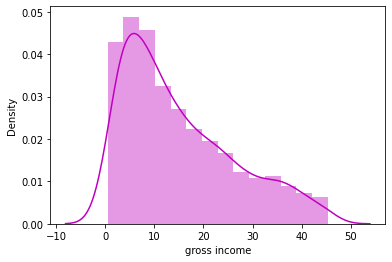

In [31]:
sns.distplot(df['gross income'],color="m")
plt.show() 

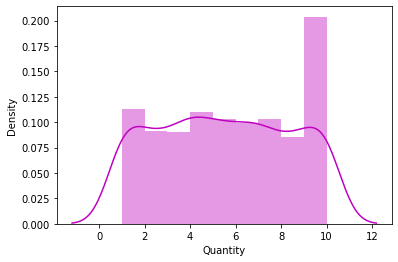

In [32]:
sns.distplot(df['Quantity'],color="m")
plt.show() 

### What is the most purchased categories by our customers?

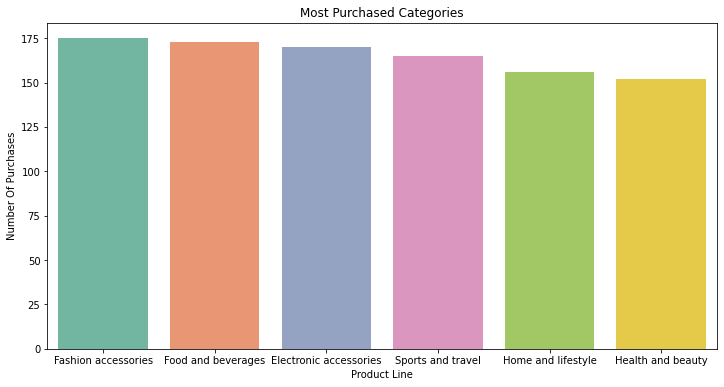

In [33]:
u=df["Product line"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=u.index, y=u, palette='Set2')
plt.xlabel("Product Line")
plt.ylabel("Number Of Purchases")
plt.title("Most Purchased Categories");

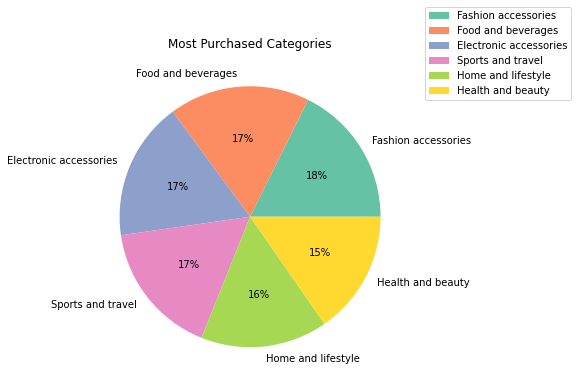

In [65]:
f=df["Product line"].value_counts()
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(f, labels=f.index,colors=palette_color,autopct='%.0f%%')
plt.legend(f.index,loc="right", bbox_to_anchor=[1.5, 1])
plt.title("Most Purchased Categories");

#### Inferences:
We can see that Faishon Accessories is the most purchased category in our stores.

We can find out why is there such a trend among different categories. We have dived into it a litlle in the analysis done below.

# Bivariate and Statistical Analysis

### What is the most purchased categories by Females?

In [35]:
df["Product line"][df['Gender']=='Female'].value_counts()


Fashion accessories       94
Food and beverages        89
Sports and travel         87
Electronic accessories    84
Home and lifestyle        77
Health and beauty         64
Name: Product line, dtype: int64

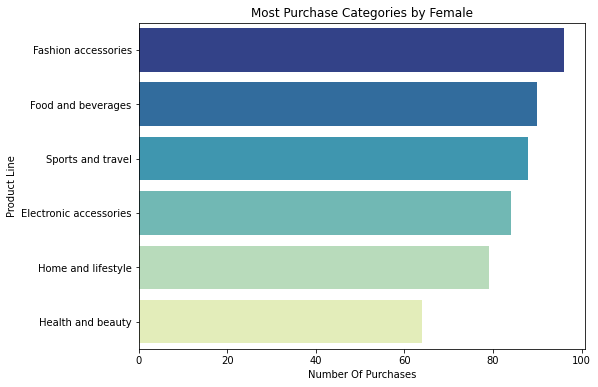

In [97]:
f=df["Product line"][df['Gender']=='Female'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=f, y=f.index, palette='YlGnBu_r')
plt.ylabel("Product Line")
plt.xlabel("Number Of Purchases")
plt.title("Most Purchase Categories by Female");

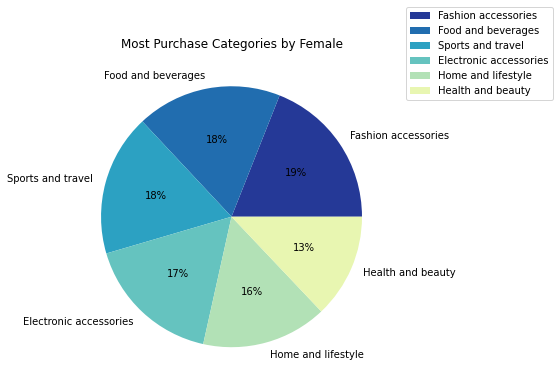

In [37]:
f=df["Product line"][df['Gender']=='Female'].value_counts()
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('YlGnBu_r')
plt.pie(f, labels=f.index,colors=palette_color,autopct='%.0f%%')
plt.legend(f.index,loc="right", bbox_to_anchor=[1.5, 1])
plt.title("Most Purchase Categories by Female");

#### Inferences:
We can see that Faishon Accessories is the most purchased category in our stores by females whereas health and beauty is lowest category purchased by the females.

#### Suggestion: 
We can put the faishon categories in the last row or column so that the female customer has to go through all the other categories and then they might be interested in those product and buy them and therefore increasing other categories sales.

### What is the most purchased categories by Males?

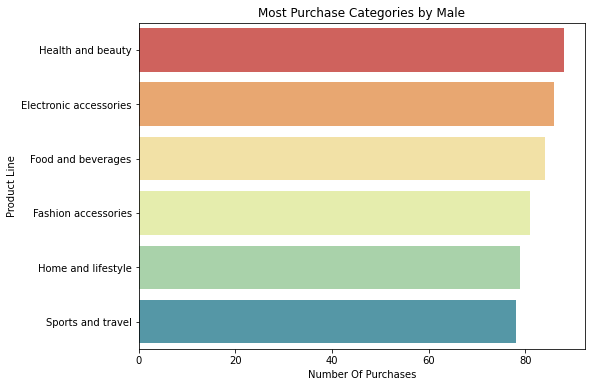

In [38]:
u=df["Product line"][df['Gender']=='Male'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=u, y=u.index, palette='Spectral')
plt.ylabel("Product Line")
plt.xlabel("Number Of Purchases")
plt.title("Most Purchase Categories by Male");

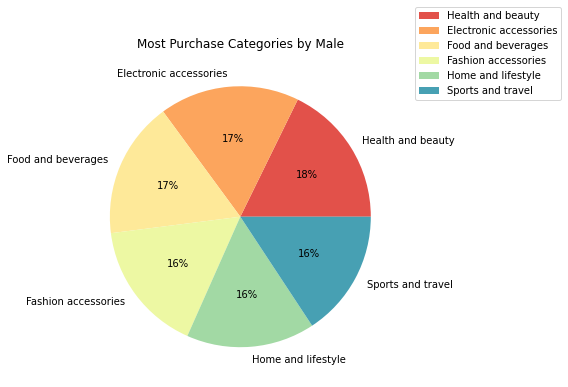

In [39]:
f=df["Product line"][df['Gender']=='Male'].value_counts()
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Spectral')
plt.pie(f, labels=f.index,colors=palette_color,autopct='%.0f%%')
plt.legend(f.index,loc="right", bbox_to_anchor=[1.5, 1])
plt.title("Most Purchase Categories by Male");

#### Inferences:
We can see that Health and Beauty is the most purchased category in our stores by males whereas sports and travel is lowest category purchased by males.

#### Suggestion: 
We can put the Health and Beaulty categories in the last row or column so that the male customer has to go through all the other categories and then they might be interested in those product and buy them and therefore increasing other categories sales.

In [40]:
df["gross income"].sum()

14940.729

### Which store branch is most profitable?

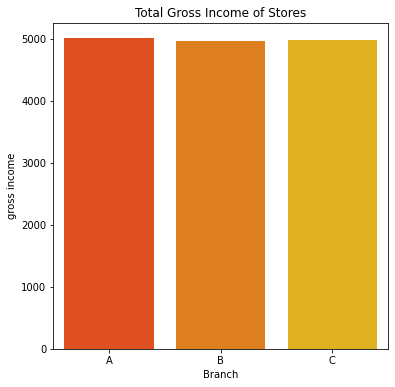

In [41]:
i=df.groupby("Branch")["gross income"].sum()
plt.figure(figsize=(6,6))
sns.barplot(x=i.index, y=i, palette='autumn')
plt.title("Total Gross Income of Stores");

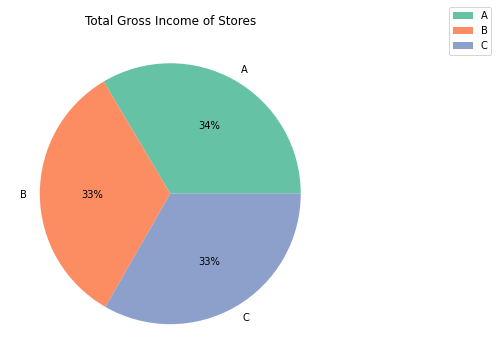

In [42]:
f=df.groupby("Branch")["gross income"].sum()
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(f, labels=f.index,colors=palette_color,autopct='%.0f%%')
plt.legend(f.index,loc="right", bbox_to_anchor=[1.5, 1])
plt.title("Total Gross Income of Stores");

#### Inferences:
We can see that branch A is the branch which has the most gross income it is contradictory to our assumption that we assumed in the above analysis. In the above analysis we have more people visiting branch A therfore we assumed that it has the most gross income and it turns out to be true.

### Who provides the most income to our store, male or female?

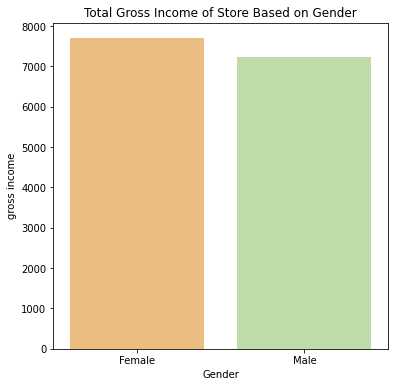

In [43]:
p=df.groupby("Gender")["gross income"].sum()
plt.figure(figsize=(6,6))
sns.barplot(x=p.index, y=p, palette='Spectral')
plt.title("Total Gross Income of Store Based on Gender");

#### Inferences:
We can see that females provide the most income to our stores despite them being in almost equal ratio with males.

#### Suggestion: 
We can increase the quantity and quality of products that the females most buy. We can also introduce new items of the category they the most from.
The category they buy most from is already analysed in the above analysis.

### Which Customer Type provides the most income to our stores?

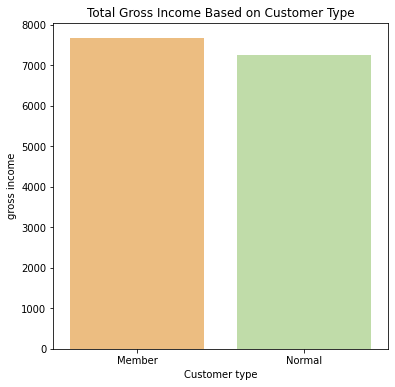

In [44]:
q=df.groupby("Customer type")["gross income"].sum()
plt.figure(figsize=(6,6))
sns.barplot(x=q.index, y=q, palette='Spectral')
plt.title("Total Gross Income Based on Customer Type");

#### Inferences:
We can see that Member provide the most income to our stores despite them being in almost equal ratio with Normal members.

#### Suggestion:
Therefore it seems that we should try to convert as many people as possible to become our members as they would try to come in our stores daily because of the benefits being provided to a member.

### Who do we have the most in our members, male or female? 

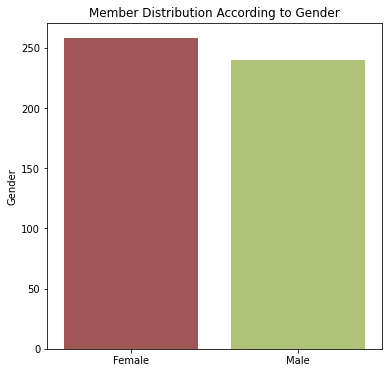

In [45]:
o=df['Gender'][df["Customer type"]=='Member'].value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=o.index, y=o, palette='tab20b_r')
plt.title("Member Distribution According to Gender");

#### Inferences:
We can see that more number of Females are our member than the number of males.

This can be due to the reason that Females visit our stores more frequently than males and hence considered the benefits of being a member of our stores as they visit our store frequently.

### Which store branch do our coustomers visit the most based on gender?

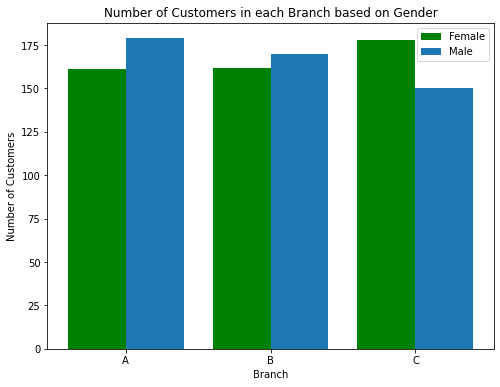

In [159]:
z=df["Branch"][df['Gender']=='Male'].value_counts().reset_index(name='Number Of Customers').sort_values('index')
y=df["Branch"][df['Gender']=='Female'].value_counts().reset_index(name='Number Of Customers').sort_values('index')
X=y.iloc[:, 0]
X_axis = np.arange(len(X))
plt.figure(figsize=(8,6))
plt.bar(X_axis - 0.2, y['Number Of Customers'], 0.4, color='g',label = 'Female')
plt.bar(X_axis + 0.2, z['Number Of Customers'], 0.4,color='C0', label = 'Male')
plt.xticks(X_axis, X)
plt.xlabel("Branch")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in each Branch based on Gender")
plt.legend()
plt.show();

#### Inferences:
We can see that most number of Males visit store branch A whereas most Females visit store branch C.

We can do more analysis on this pattern that we have found in the future.

### What payment methode do our customers use the most based on gender?

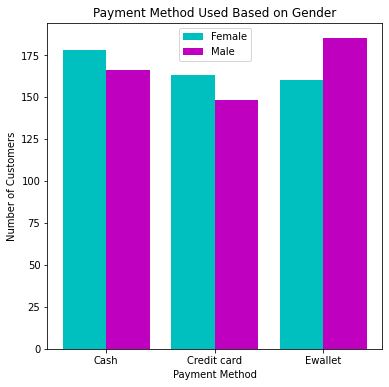

In [161]:
z=df["Payment"][df['Gender']=='Male'].value_counts().reset_index(name='Number Of Customers').sort_values('index')
y=df["Payment"][df['Gender']=='Female'].value_counts().reset_index(name='Number Of Customers').sort_values('index')
X=y.iloc[:, 0]
X_axis = np.arange(len(X))
plt.figure(figsize=(6,6))
plt.bar(X_axis - 0.2, y['Number Of Customers'], 0.4, color='c',label = 'Female')
plt.bar(X_axis + 0.2, z['Number Of Customers'], 0.4, color='m', label = 'Male')
plt.xticks(X_axis,X )
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.title("Payment Method Used Based on Gender")
plt.legend()
plt.show();

#### Inferences:
We can see most Males use Ewallet whereas most Females use cash as a payment method.

This patter could be for the reason that most Males are tech geeks and know how to utilise Ewallet easily whereas Females face some trouble when using Ewallet.
#### Suggestion: 
We can partner up with an edtech company and make our Ewallet transactions smoother and more diversified for customers. So that they can use it more easily. This will save time both for our customers and our staff.

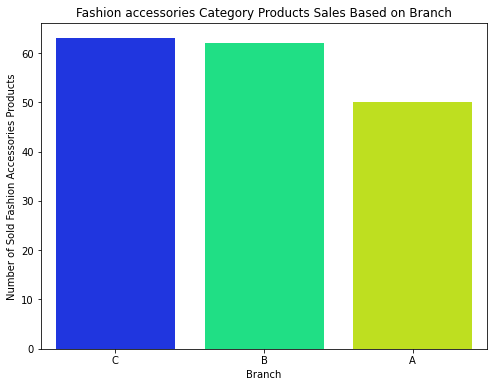

In [184]:
u=df['Branch'][df["Product line"]=='Fashion accessories'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=u.index, y=u, palette='gist_rainbow_r')
plt.xlabel("Branch")
plt.ylabel("Number of Sold Fashion Accessories Products")
plt.title("Fashion accessories Category Products Sales Based on Branch");

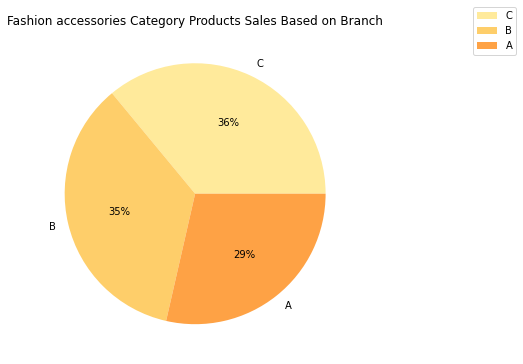

In [136]:
f=df['Branch'][df["Product line"]=='Fashion accessories'].value_counts()
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('YlOrRd')
plt.pie(f, labels=f.index,colors=palette_color,autopct='%.0f%%')
plt.legend(f.index,loc="right", bbox_to_anchor=[1.5, 1])
plt.title("Fashion accessories Category Products Sales Based on Branch");

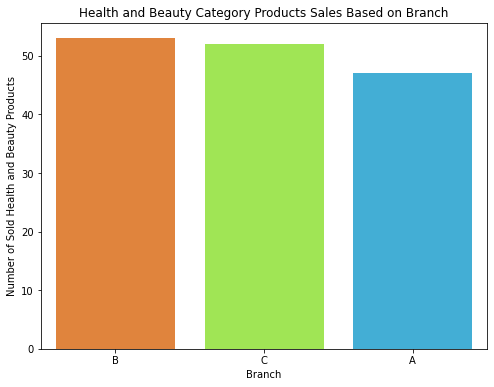

In [140]:
u=df['Branch'][df["Product line"]=='Health and beauty'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=u.index, y=u, palette='turbo_r')
plt.xlabel("Branch")
plt.ylabel("Number of Sold Health and Beauty Products")
plt.title("Health and Beauty Category Products Sales Based on Branch");

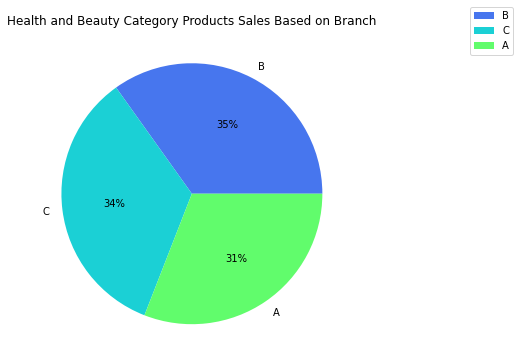

In [139]:
f=df['Branch'][df["Product line"]=='Health and beauty'].value_counts()
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('turbo')
plt.pie(f, labels=f.index,colors=palette_color,autopct='%.0f%%')
plt.legend(f.index,loc="right", bbox_to_anchor=[1.5, 1])
plt.title("Health and Beauty Category Products Sales Based on Branch");

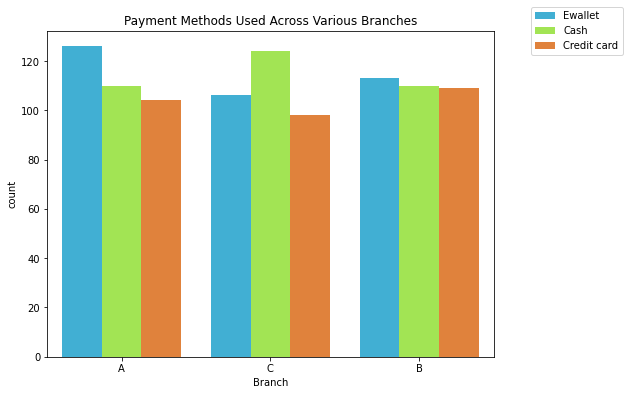

In [175]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.Branch, hue = df.Payment,palette='turbo')
plt.legend(loc="right", bbox_to_anchor=[1.3, 1])
plt.title('Payment Methods Used Across Various Branches');


In [122]:
df['Month']=df['Date'].str.split('/').str[0]
df['Date 2']=df['Date'].str.split('/').str[1]
df['Year']=df['Date'].str.split('/').str[2]



In [123]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Date 2,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8,2019


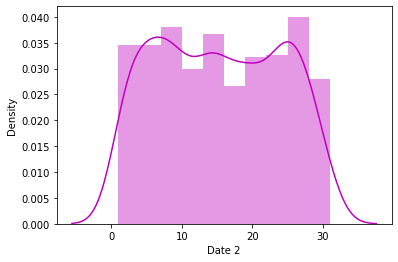

In [124]:
sns.distplot(df['Date 2'],color="m");


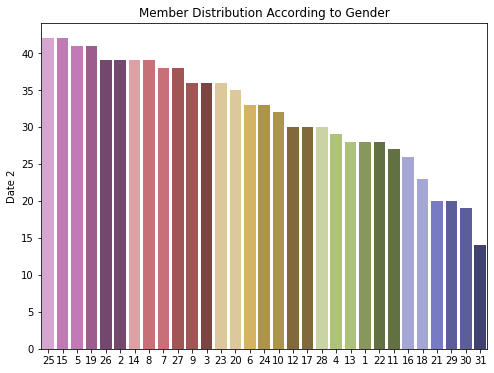

In [125]:
u=df['Date 2'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=u.index, y=u, palette='tab20b_r')
plt.title("Member Distribution According to Gender");

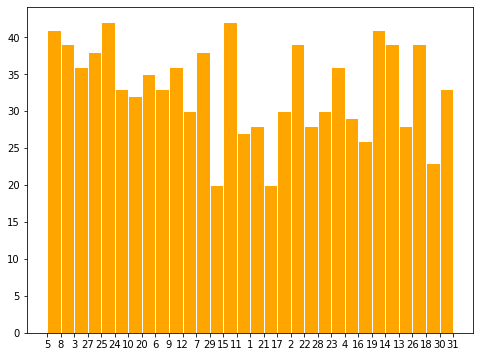

In [126]:
plt.figure(figsize=(8,6))
plt.hist(df['Date 2'], bins=30,color="orange",edgecolor="white");
plt.show()

### Correlation using heatmap

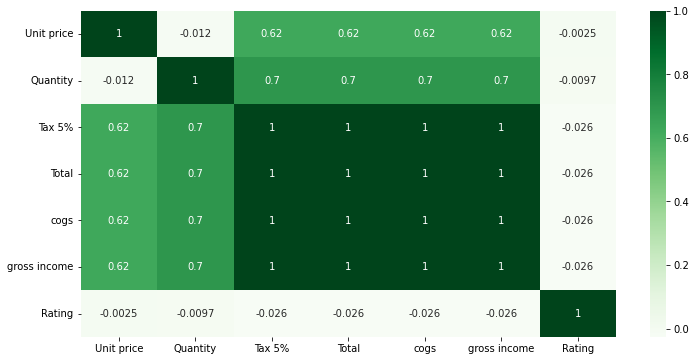

In [191]:
plt.figure(figsize=(12,6))
df=df.drop('gross margin percentage',axis=1)
sns.heatmap(df.corr(),annot=True,cmap='Greens');

### Pairplot

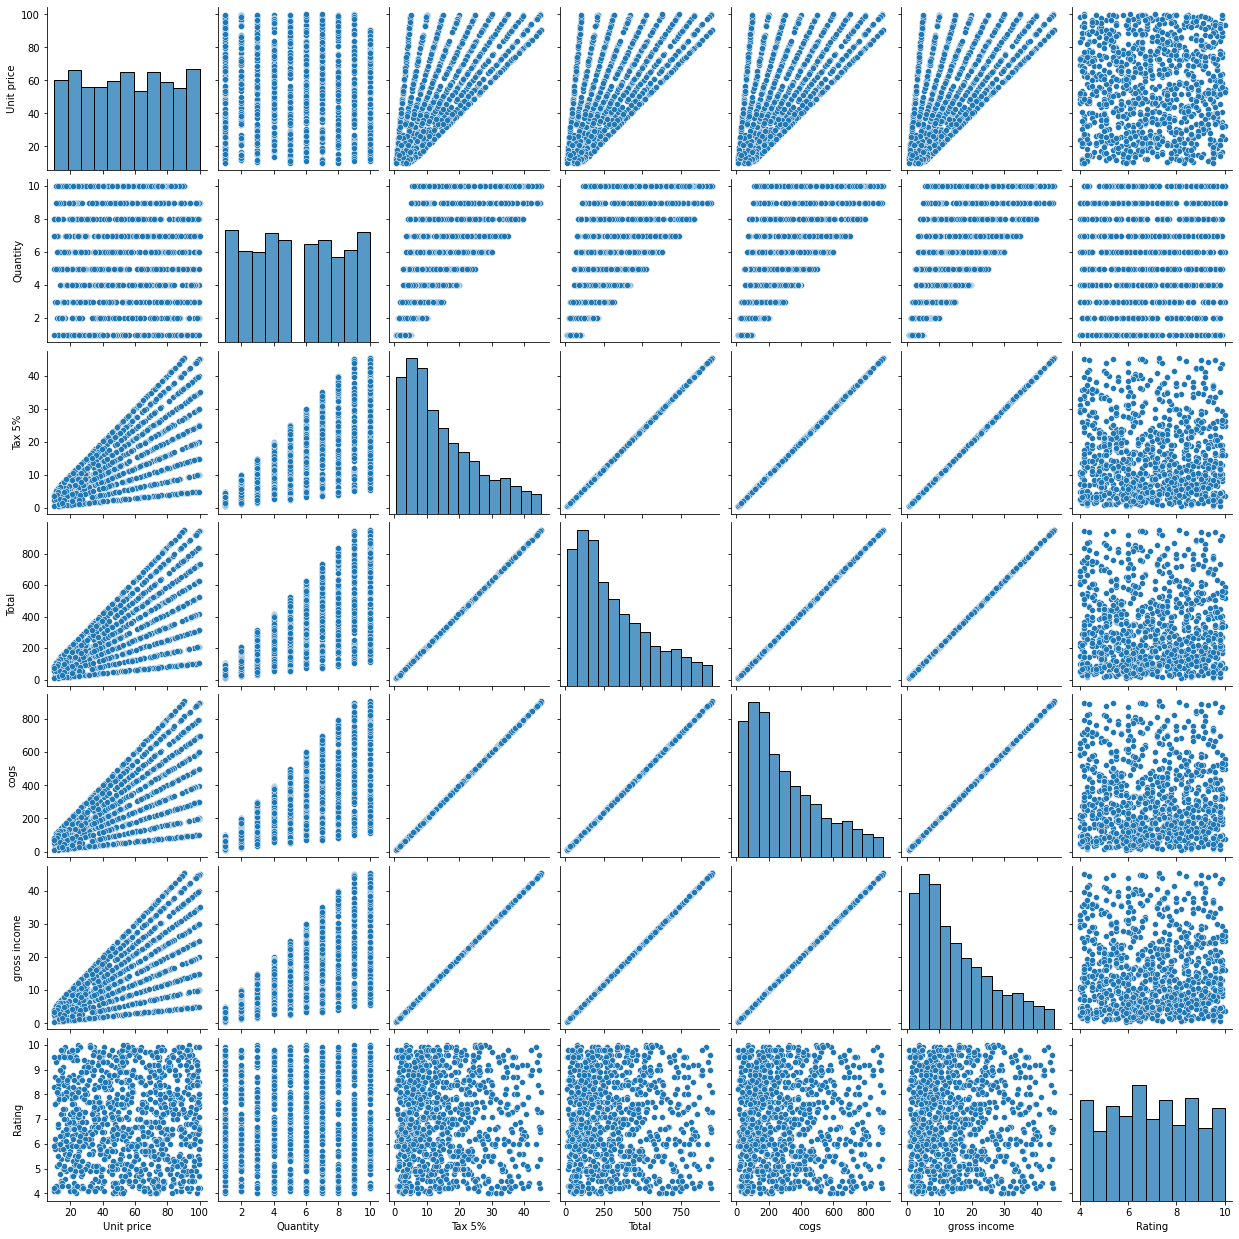

In [192]:
sns.pairplot(df);